In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [64]:
df = pd.read_csv("C:/Users/sanke/Desktop/LP 5/DL/1_boston_housing.csv")

In [65]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [66]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

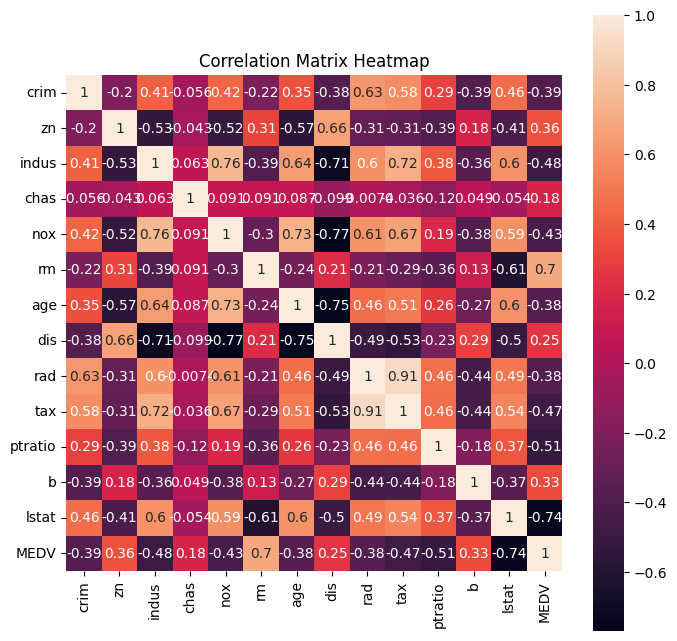

In [67]:
# Compute correlation matrix
correlation = df.corr()
# Plot heatmap
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(correlation, square=True, annot=True, cbar=True, ax=axes)
axes.set_title('Correlation Matrix Heatmap')

In [68]:
# Splitting the dependent feature and independent feature
X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']

In [69]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 123)

In [70]:
#Linear Regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [71]:
#Prediction on the test dataset
y_pred = regressor.predict(X_test)

In [72]:
# Assuming 'y_pred' contains the predicted values and 'y_test' contains the true values
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 28.405854810508266
Root Mean Squared Error: 5.329714327288872


In [73]:
# Neural Networks
#Scaling the dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [74]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               1792      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.05, verbose = 1)

Epoch 1/10
11/11 [==============================] - 3s 60ms/step - loss: 588.3356 - mae: 22.4207 - val_loss: 591.8123 - val_mae: 22.4642
Epoch 2/10
11/11 [==============================] - 0s 14ms/step - loss: 529.2289 - mae: 21.1200 - val_loss: 527.1228 - val_mae: 21.1319
Epoch 3/10
11/11 [==============================] - 0s 14ms/step - loss: 455.2419 - mae: 19.4015 - val_loss: 438.4128 - val_mae: 19.1796
Epoch 4/10
11/11 [==============================] - 0s 16ms/step - loss: 356.3285 - mae: 16.9030 - val_loss: 325.9374 - val_mae: 16.3482
Epoch 5/10
11/11 [==============================] - 0s 16ms/step - loss: 238.7439 - mae: 13.4787 - val_loss: 205.5905 - val_mae: 12.5162
Epoch 6/10
11/11 [==============================] - 0s 13ms/step - loss: 132.9459 - mae: 9.4990 - val_loss: 113.9048 - val_mae: 9.1172
Epoch 7/10
11/11 [==============================] - 0s 15ms/step - loss: 75.4590 - mae: 6.7948 - val_loss: 67.9842 - val_mae: 6.6502
Epoch 8/10
11/11 [=============================

In [76]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 7ms/step - loss: 37.7979 - mae: 4.0864
Mean squared error on test data:  37.797882080078125
Mean absolute error on test data:  4.0864152908325195


5/5 [==============================] - 0s 8ms/step


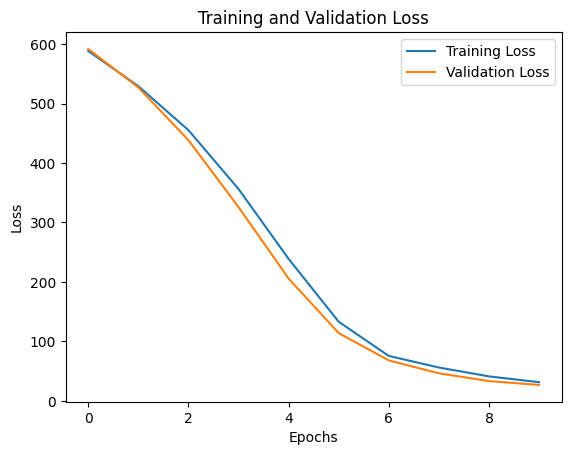

In [77]:
# Predict on test data
predictions = model.predict(X_test)

# 1. Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

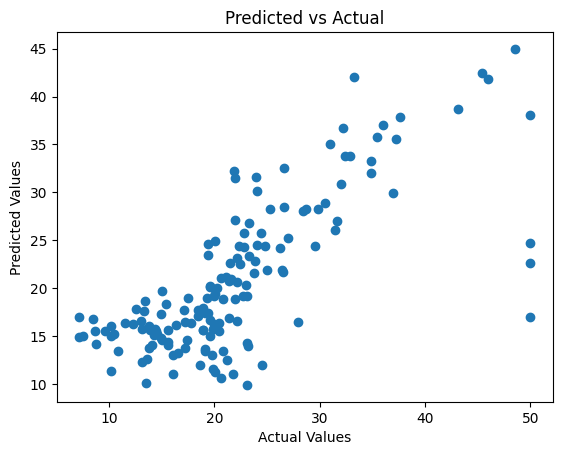

In [78]:
# 2. Scatter Plot of Predicted vs Actual Values
plt.scatter(y_test, predictions)
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()